###	selection optimisation:

 roulette selection is used in basic implementation - proportional selection of parents based on fitness score

 however better results can be seen from tournament selection

tournament selection:
- choose a few individuals at random
- only the fittest one becomes a parent



 reference:

 - http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.140.3747

 documentation:

 - https://brandinho.github.io/genetic-algorithm/

 - https://stackoverflow.com/questions/23183862/what-is-the-difference-between-roulette-wheel-selection-rank-selection-and-tour



In [1]:
from BasicGaAlgorithim import (
                                generate_population,
                                fitness_function,
                                # selection,
                                crossover,
                                mutation,
                                check_for_perfect_genotype,
                                calculate_perfect_score
                            )

In [2]:
from OptimiseGaAlgorithim import (
                                selection
)


population = generate_population(3, 6)
fitness_scores = [fitness_function(genotype) for genotype in population]
selection(population, 6, 2)

selection(population=population,size_of_population=6,tournament_population_size=5)

# [([2, 2, 0], [2, 1, 0]), ([2, 2, 0], [2, 1, 0]), ([0, 2, 1], [2, 1, 0])]

[([0, 1, 1], [1, 0, 0]),
 ([0, 1, 1], [1, 0, 0]),
 ([0, 1, 1], [0, 1, 1]),
 ([0, 1, 1], [1, 1, 0]),
 ([0, 1, 1], [1, 1, 0]),
 ([0, 1, 1], [0, 1, 1])]

generation

In [3]:
def generation(population, size_of_population, number_of_queens, mutation_frequency, tournament_population_size):
    # # b) fitness function
    # fit_scores = [fitness_function(genotype) for genotype in population]

    # c) selection
    # TODO not setting number of tournaments
    selected_pairs = selection(population, size_of_population, tournament_population_size)
    
    # d) cross over
    offspring = crossover(selected_pairs, number_of_queens)

    # e) mutation
    mutated = mutation(offspring, mutation_frequency, number_of_queens)

    return mutated

# a) Initial Population
population = generate_population(6, 6)
generation(population, 6, 6, 2, 3)


[[4, 5, 4, 2, 0, 4],
 [3, 2, 4, 5, 2, 2],
 [5, 0, 2, 4, 3, 0],
 [2, 5, 5, 2, 2, 3],
 [5, 5, 5, 4, 1, 4],
 [4, 3, 1, 2, 5, 3]]

In [4]:
import timeit

NUMBER_OF_QUEENS=8
SIZE_OF_POPULATION=25
MUTATION_FREQUENCY = 8
# TODO HOW IS THIS CALCULATED
PERFECT_SCORE = calculate_perfect_score(NUMBER_OF_QUEENS)
TOURNAMENT_POPULATION_SIZE = 5


def genetic_algorithm(population):

    start_time = timeit.default_timer()

    gen = 0
    completed_genotype = []

    # # g) check if it has found correct state and exit loop
    while not completed_genotype:
        population = generation(population, SIZE_OF_POPULATION, NUMBER_OF_QUEENS, MUTATION_FREQUENCY, TOURNAMENT_POPULATION_SIZE)
        completed_genotype = check_for_perfect_genotype(population, PERFECT_SCORE)
        gen += 1

        if gen == 100000:
            break

    stop_time = timeit.default_timer()

    return {
        "elapsed_time": stop_time - start_time,
        "number_of_generations": gen,
        "completed_state": completed_genotype
    }

# a) generate initial population
population = generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION)

ga_result = genetic_algorithm(population)

ga_result

{'elapsed_time': 1.3884358000000034,
 'number_of_generations': 337,
 'completed_state': [5, 3, 6, 0, 7, 1, 4, 2]}

In [53]:

import pickle

test_populations_name = 'test_populations_25'

with open(test_populations_name, 'rb') as f:
    test_population = pickle.load(f)

results = {
        "elapsed_time": [],
        "number_of_generations": [],
        "completed_state": []
}

for pop in test_population:

        ga_result = genetic_algorithm(population)

        results["elapsed_time"].append(ga_result["elapsed_time"])
        results["number_of_generations"].append(ga_result["number_of_generations"])
        results["completed_state"].append(ga_result["completed_state"])

        print(f"elapsed_time:")
        print(ga_result["elapsed_time"])
        print(f"number_of_generations:")
        print(ga_result["number_of_generations"])
        print(f"completed_state:")
        print(ga_result["completed_state"])
        print("=========================")

results

elapsed_time:
4.118996999999581
number_of_generations:
713
completed_state:
[5, 2, 6, 1, 3, 7, 0, 4]
elapsed_time:
1.201031999999941
number_of_generations:
206
completed_state:
[5, 2, 6, 1, 3, 7, 0, 4]
elapsed_time:
2.1884151999993264
number_of_generations:
394
completed_state:
[1, 5, 0, 6, 3, 7, 2, 4]
elapsed_time:
0.23831159999917872
number_of_generations:
45
completed_state:
[3, 1, 6, 2, 5, 7, 4, 0]
elapsed_time:
0.4359167000002344
number_of_generations:
68
completed_state:
[6, 2, 7, 1, 4, 0, 5, 3]
elapsed_time:
0.16017869999996037
number_of_generations:
26
completed_state:
[5, 3, 6, 0, 2, 4, 1, 7]
elapsed_time:
1.9082928000007087
number_of_generations:
281
completed_state:
[3, 0, 4, 7, 1, 6, 2, 5]
elapsed_time:
1.3008356000000276
number_of_generations:
180
completed_state:
[2, 4, 1, 7, 0, 6, 3, 5]
elapsed_time:
0.43183480000061536
number_of_generations:
78
completed_state:
[3, 0, 4, 7, 5, 2, 6, 1]
elapsed_time:
0.24435770000036428
number_of_generations:
43
completed_state:
[2, 5, 1

{'elapsed_time': [4.118996999999581,
  1.201031999999941,
  2.1884151999993264,
  0.23831159999917872,
  0.4359167000002344,
  0.16017869999996037,
  1.9082928000007087,
  1.3008356000000276,
  0.43183480000061536,
  0.24435770000036428,
  0.30397050000010495,
  1.9795036999994409,
  0.28033659999982774,
  0.1058601999993698,
  0.9509554999995089,
  0.07617130000016914,
  0.781844899999669,
  0.4921839999997246,
  0.15555750000021362,
  1.0502707000005103,
  1.0667057999999088,
  1.1699765000003026,
  0.5477473999999347,
  0.5768324000000575,
  0.6959526000000551,
  2.4829257999999754,
  0.415736800000559,
  0.6451631999998426,
  0.7307821999993394,
  0.8060187000000951,
  5.218070599999919,
  0.08785609999995359,
  0.3244720000002417,
  2.835996300000261,
  1.0062702999994144,
  0.7655251000005592,
  1.9843440000004193,
  2.8162389999997686,
  2.7353577000003497,
  3.2634566999995513,
  0.21331030000055762,
  1.5412132000001293,
  0.7403969999995752,
  0.37859409999964555,
  0.2839506

    elapsed_time  number_of_generations           completed_state
0       4.118997                    713  [5, 2, 6, 1, 3, 7, 0, 4]
1       1.201032                    206  [5, 2, 6, 1, 3, 7, 0, 4]
2       2.188415                    394  [1, 5, 0, 6, 3, 7, 2, 4]
3       0.238312                     45  [3, 1, 6, 2, 5, 7, 4, 0]
4       0.435917                     68  [6, 2, 7, 1, 4, 0, 5, 3]
..           ...                    ...                       ...
95      0.986334                    162  [2, 5, 3, 0, 7, 4, 6, 1]
96      0.603747                     98  [2, 6, 1, 7, 5, 3, 0, 4]
97      1.729726                    278  [1, 5, 0, 6, 3, 7, 2, 4]
98      0.907495                    146  [3, 7, 0, 4, 6, 1, 5, 2]
99      3.077814                    504  [2, 6, 1, 7, 4, 0, 3, 5]

[100 rows x 3 columns]
mean_number_of_generations: 193.82
std_number_of_generations: 165.06964431641416
mean_elapsed_time: 1.2320989349999854
std_elapsed_time: 1.062681803125268
over_30_seconds
Empty DataFra

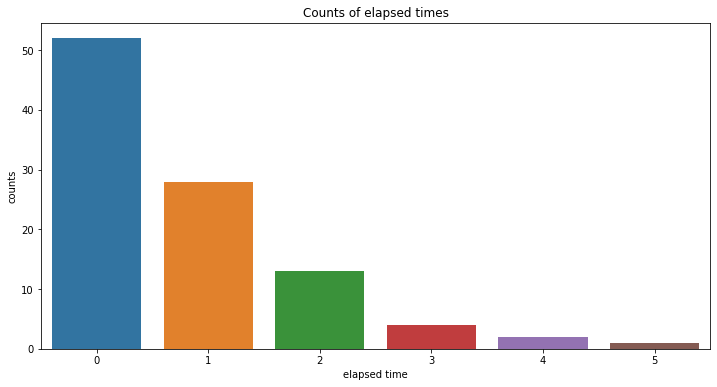

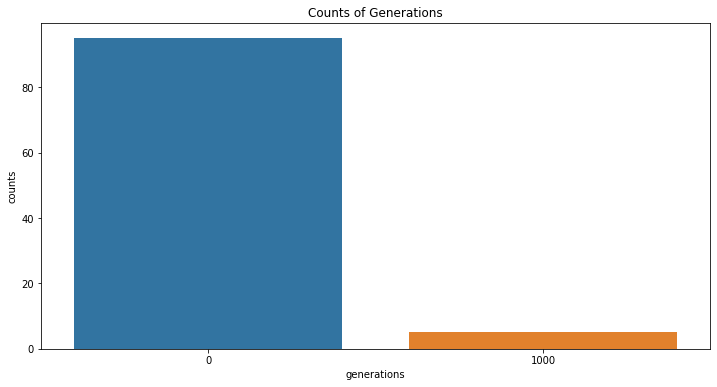

In [54]:
import os

unique_identifier = "100_25_new_population"
parent_directory = "C:\\Users\\SAB68\\repos\\samsambutdifferent\\eight-queen-problem\\results\\optimise-selection"

path = os.path.join(parent_directory, unique_identifier)

if not os.path.exists(path):
    os.mkdir(path)

config = {
    "NUMBER_OF_QUEENS": NUMBER_OF_QUEENS,
    "SIZE_OF_POPULATION": SIZE_OF_POPULATION,
    "MUTATION_FREQUENCY": MUTATION_FREQUENCY,
    "PERFECT_SCORE": PERFECT_SCORE,
    "test_file": test_populations_name
}

f = open(path + "\\config", "w")

for item in config.items():
    f.writelines(str(item) + '\n')
f.close()


import pandas as pd

results_df = pd.DataFrame(results)

mean_number_of_generations = results_df["number_of_generations"].mean()
mean_elapsed_time = results_df["elapsed_time"].mean()

std_number_of_generations = results_df["number_of_generations"].std()
std_elapsed_time = results_df["elapsed_time"].std()

print(results_df)

print(f"mean_number_of_generations: {mean_number_of_generations}")
print(f"std_number_of_generations: {std_number_of_generations}")
print(f"mean_elapsed_time: {mean_elapsed_time}")
print(f"std_elapsed_time: {std_elapsed_time}")


f = open(path + "\\metrics", "w")
f.writelines(f"mean_number_of_generations: {mean_number_of_generations}" + '\n')
f.writelines(f"std_number_of_generations: {std_number_of_generations}" + '\n')
f.writelines(f"mean_elapsed_time: {mean_elapsed_time}" + '\n')
f.writelines(f"std_elapsed_time: {std_elapsed_time}" + '\n')
f.writelines('\n')
f.write(str(results_df))
f.close()


# check all results finish
over_30_seconds = results_df[results_df["elapsed_time"] > 30]
f = open(path + "\\over_30_seconds", "w")
f.write(str(over_30_seconds))
f.close()
print("over_30_seconds")
print(over_30_seconds)


import math

def round_down_to_1000(x):
    return round(x, -3) 


floored_elapsed_time = results_df["elapsed_time"].apply(math.floor)
floored_number_of_generations = results_df["number_of_generations"].apply(round_down_to_1000)

frame = { 'elapsed_time': floored_elapsed_time, 'number_of_generations': floored_number_of_generations }

floored_results_df = pd.DataFrame(frame)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.elapsed_time.value_counts().index, y=floored_results_df.elapsed_time.value_counts())

plt.xlabel("elapsed time")
plt.ylabel("counts")
plt.title("Counts of elapsed times")
plt.savefig(path + '/counts_of_elapsed_time.png')
plt.show(fig)

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.number_of_generations.value_counts().index, y=floored_results_df.number_of_generations.value_counts())

plt.xlabel("generations")
plt.ylabel("counts")
plt.title("Counts of Generations")
plt.savefig(path + '/counts_of_generations.png')
plt.show(fig)
